In [1]:
from create_data import DumbCirc as dc
from labelsq import LabeledSUQ as lsq
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = dc(0.5, 0.5, 0.25, 22)
fc, pc, tc = data_instance.create_dataset(50, 2, [50], [0.2], True)

In [3]:
import torch
torch.manual_seed(22)
fc, pc, tc = torch.tensor(fc), torch.tensor(pc), torch.tensor(tc)

In [4]:
model = lsq(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [5]:
use_cuda = torch.cuda.is_available()
#device = torch.device("cuda" if use_cuda else "cpu")
device = "cpu"
model.set_device(device)

In [6]:
model.set_test_data(tc)

In [7]:
model.train(num_epochs=20, batch_size=20, learning_rate=0.001)

C:\Users\Acer\Documents\All_of_RWTH\ThesisTarget\1MYWORK\thesis_notebooks\labelsq.py:148: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3679.)
  + posterior_mean.T @ torch.linalg.inv(posterior_var) @ posterior_mean)


Epoch:0, Loss: 0.005681068683043122
Epoch:1, Loss: 0.0061297687562182545
Epoch:2, Loss: 0.005229888546280563
Epoch:3, Loss: 0.004698794172983617
Epoch:4, Loss: 0.004559306837785989
Epoch:5, Loss: 0.004443848867002874
Epoch:6, Loss: 0.004361422059691697
Epoch:7, Loss: 0.004271851007846593
Epoch:8, Loss: 0.004217013000607758
Epoch:9, Loss: 0.004157358648926818
Epoch:10, Loss: 0.004110666326474558
Epoch:11, Loss: 0.004084692880836161
Epoch:12, Loss: 0.004014827594505406
Epoch:13, Loss: 0.003988082169903399
Epoch:14, Loss: 0.00392244906367249
Epoch:15, Loss: 0.003872844760711266
Epoch:16, Loss: 0.003850044395762488
Epoch:17, Loss: 0.0038134445735694827
Epoch:18, Loss: 0.0037603984751547496
Epoch:19, Loss: 0.0037281196434385106


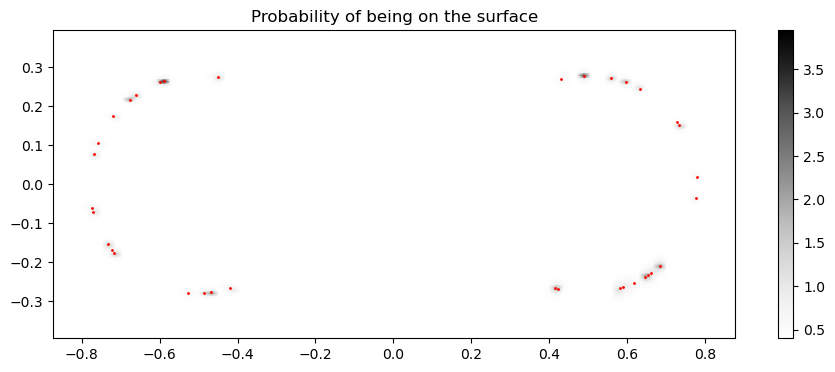

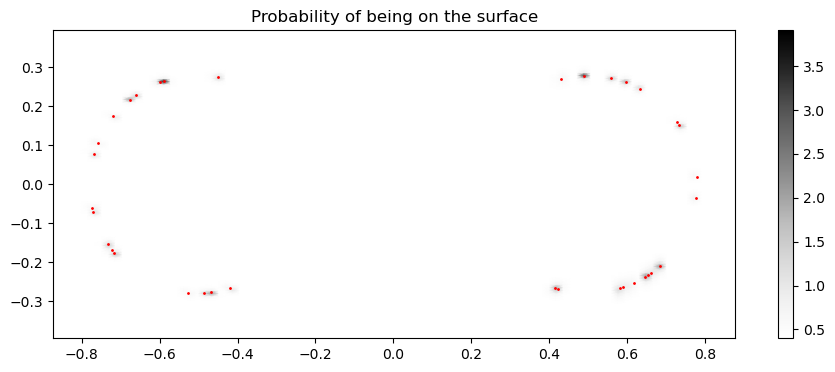

In [8]:
model.predict()

In [11]:
model.set_test_data(pc[2:4, :])

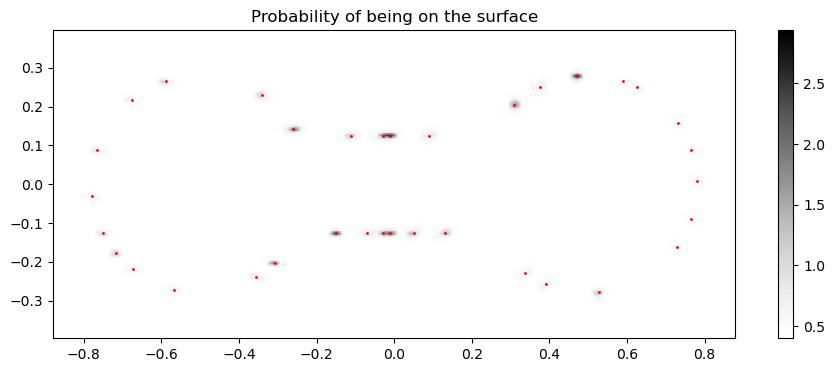

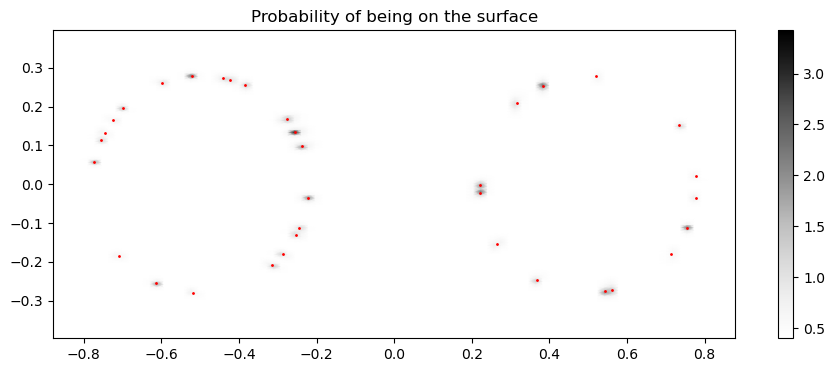

In [12]:
model.predict()